In [ ]:
import gensim

model = gensim.models.KeyedVectors.load_word2vec_format('/content/ruscorpora_mean_hs.model.bin', binary=True)

In [ ]:
vocab = list(model.wv.vocab)
print(vocab[:20])
print(len(vocab))  

['это_SPRO', 'весь_APRO', 'человек_S', 'мочь_V', 'год_S', 'сказать_V', 'время_S', 'говорить_V', 'становиться_V', 'знать_V', 'самый_APRO', 'жизнь_S', 'дело_S', 'день_S', 'рука_S', 'первый_ANUM', 'очень_ADV', 'новый_A', 'это_PART', 'давать_V']
281776


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


In [ ]:
test_words = ['день_S', 'это_SPRO', 'человек_S', 'говорить_V', 'студент_S', 'очень_ADV']

In [ ]:
x_ticks = []
y_ticks = []
for word in test_words:
    # есть ли слово в модели? Может быть, и нет
    if word in model:
        print(word)
        # выдаем 10 ближайших соседей слова:
        x_tick = []
        y_tick = []
        for i in model.most_similar(positive=[word], topn=10):
            # слово + коэффициент косинусной близости
            x_tick.append(i[0])
            y_tick.append(i[1])
            print(i[0], i[1])
        print('\n')
        x_ticks.append(x_tick)
        y_ticks.append(y_tick)
    else:
        # Увы!
        print(word + ' is not present in the model')

день_S
неделя_S 0.7165195941925049
месяц_S 0.631048858165741
вечер_S 0.5828739404678345
утро_S 0.5676207542419434
час_S 0.5605547428131104
минута_S 0.5297019481658936
гекатомбеон_S 0.4897990822792053
денек_S 0.48224714398384094
полчаса_S 0.48217129707336426
ночь_S 0.478074848651886


это_SPRO
это_PART 0.6421902775764465
онюй_S 0.5176955461502075
вышесказанный_A 0.5041234493255615
морстопом_ADV 0.5016064643859863
оно_SPRO 0.46259987354278564
остальное_S 0.43427807092666626
вышеизложенный_A 0.42004716396331787
поэтому_ADVPRO 0.4165307581424713
многое_SPRO 0.3923282027244568
чтб_UNKN 0.38723695278167725


человек_S
женщина_S 0.5979775190353394
парень_S 0.4991787374019623
мужчина_S 0.4767409563064575
мужик_S 0.47384002804756165
россиянин_S 0.47190436720848083
народ_S 0.4654741883277893
согражданин_S 0.45378512144088745
горожанин_S 0.44368088245391846
девушка_S 0.44314485788345337
иностранец_S 0.43849867582321167


говорить_V
сказать_V 0.7529336214065552
разговаривать_V 0.6088395714759827
с

In [ ]:
print(model.similarity('человек_S', 'обезьяна_S'))

0.23895611


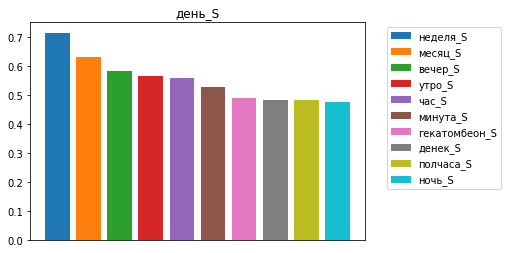

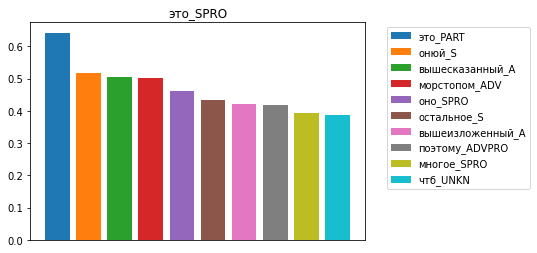

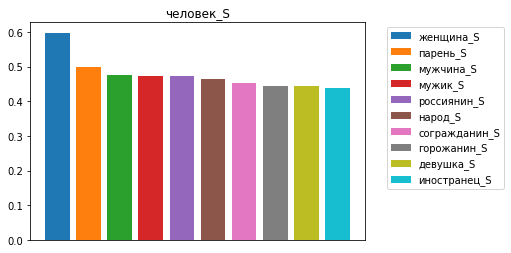

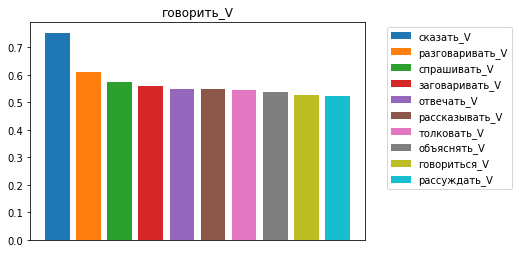

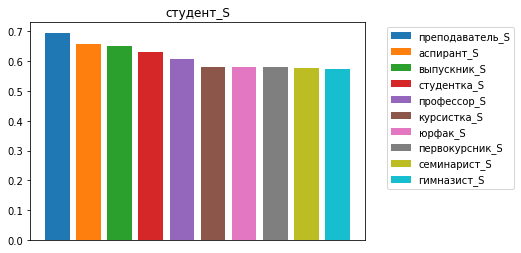

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

for i in range (5):
  plt.title(test_words[i])
  for j in range (10):
    plt.bar( x_ticks[i][j], y_ticks[i][j])
  plt.xticks([])
  plt.legend(x_ticks[i] , bbox_to_anchor=(1.05, 1))
  plt.show()
  plt.close()